In [28]:
import datetime as dt
import os
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable


from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')





In [29]:
#General parameters:

cmap = plt.get_cmap('nipy_spectral')
cmap.set_bad('burlywood')
H = 24 #A day hasZZZZZ

points = []

1896 3


In [32]:
#points


points = []

particle = 1 #start particle counter

start = dt.datetime.now()

print ("start: ", start)


with open(direct + "/traj.txt") as file:

    for i, line in enumerate(file):
        
                

        line = line.strip('\n').split()

        line = [float(k) for k in line]

        line = np.array(line)

       
        if line[0] == particle:
            index = i+position
            particle += 1
            
        if i == index:
            points.append (line)

points = np.array(points)

print ("time: ", dt.datetime.now() - start)


start:  2017-04-11 10:09:10.705279
time:  0:03:40.112159


In [62]:
for i in points[0]:
    print (type(i))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [55]:
print(len(points)) #For a month with 30 days, we expect 30*72 trajectories

2159


In [63]:
np.shape(points)[0]

2159

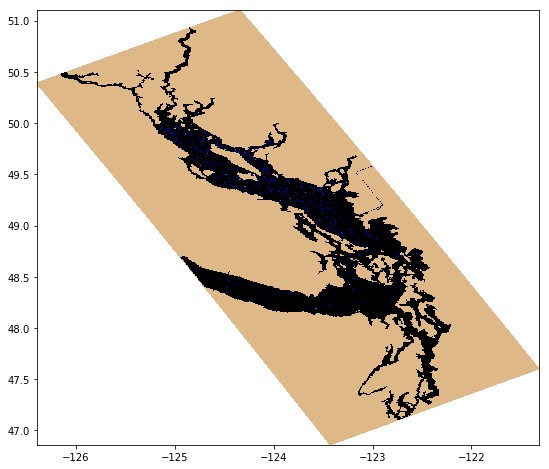

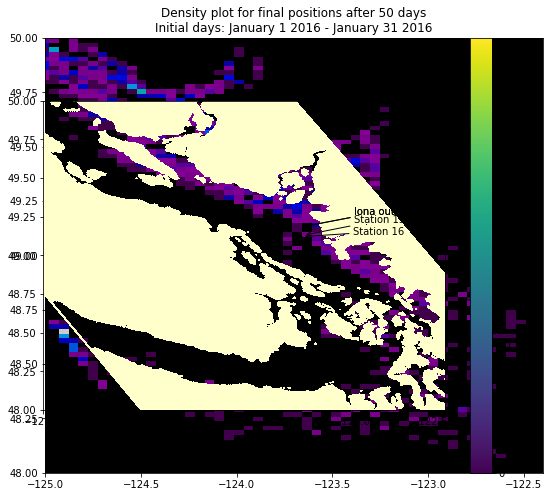

In [53]:
#Giorgio's plot

plt.clf()

# set up array of zeros of shape of model domain; also load tmask, model lons and lats
mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
tmask=np.copy(mesh.variables['tmask'])
mesh.close()
fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
nav_lon=np.copy(fb.variables['nav_lon'])
nav_lat=np.copy(fb.variables['nav_lat'])
fb.close()

griddata=0.0*tmask[0,0,:,:]
griddata.shape


np.shape(points)[0]


for ii in range(0,np.shape(points)[0]):
    j,i=geo_tools.find_closest_model_point(points[ii,1],points[ii,2],nav_lon,nav_lat)
    #print(points[ii,1],points[ii,2],j,i)
    griddata[j,i]=griddata[j,i]+1


# In[13]:

fig, axs = plt.subplots(1,1,figsize=(9,8))



# In[15]:

lonlim=[np.min(nav_lon),np.max(nav_lon)]
latlim=[np.min(nav_lat),np.max(nav_lat)]

griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])


# In[16]:

Jedges,Iedges=np.meshgrid(jedges,iedges)


# In[17]:

Jedges.shape


# In[18]:

griddata.shape


# In[19]:

xl=(-125,-122.4)
yl=(48,50)
fig, axs = plt.subplots(1,1,figsize=(9,8))
mesh0 = axs.pcolormesh(Iedges,Jedges,griddata,cmap=cmap)
axs.set_xlim(xl)
axs.set_ylim(yl)
#axs.plot(-124.0,49.5,'r*')
viz_tools.set_aspect(axs,coords='map')
pos=axs.get_position()
axs2 = plt.axes(pos)

mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap='YlOrRd')



axs2.set_xlim(xl)
axs2.set_ylim(yl)
axs2.patch.set_alpha(0)
viz_tools.set_aspect(axs2,coords='map')



from matplotlib import cm


# Make plot with vertical (default) colorbar


data = griddata

cax = axs2.imshow(data, interpolation='nearest')
axs.set_title("Density plot for final positions after 50 days\n"
          "Initial days: January 1 2016 - January 31 2016")

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax)
  # vertically oriented colorbar
    
cbar.set_label ("Counts")

viz_tools.set_aspect(axs,coords='map')

plt.annotate(
"Iona outfall",
xy=(Iona[0], Iona[1]), xytext=(50, 10),
textcoords='offset points', ha='left', va='bottom',
arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))




                        
plt.annotate(
        "Iona outfall",
        xy=(Iona[0], Iona[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))





S15 = (-123.3114, 49.130412)
S16 = (-123.317415, 49.1214)

plt.annotate(
        "Station 15",
        xy=(S15[0],S15[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.annotate(
        "Station 16",
        xy=(S16[0],S16[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='top',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.show()





In [35]:
fig.savefig(direct + "/plot{}days".format(nday))